#CM4709 Computer Vision
#Solution to Lab 02 Image Processing using OpenCV

##Aims
1. Explore structure of an image.
1. Perform Affine/geometric transformation using OpenCV.
1. Using linear filters in OpenCV.
1. Using sharpening/Laplacian filters.
1. Detecting edges.


##Getting the Resources
To experiment with OpenCV, we need some images/resources.
1. Download the images from Moodle.
1. Save and upload the images into your GoogleDrive. e.g. `/cm4709/Lab02/data`.

##Mounting GoogleDrive in Colab
As in Lab01, you need to mount your GoogleDrive onto your Colab runtime to access it. The following code is quite standard:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Your image folder will be accessible at `/content/gdrive/MyDrive/cm4709/Lab02/data`, or modify the path accordingly if you have save the images into a different folder in GoogleDrive.

##Exploring an Image
We start by loading an image using OpenCV and displaying it. As mentioned in Lab01, OpenCV's `imshow(...)` function does not work well with Colab. We will use `matplotlib` to show it instead.

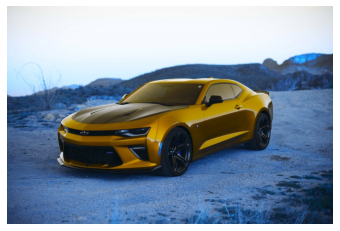

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name

image=cv.imread(fileName)   #load image
plt.axis('off')             #turn off axis
plt.imshow(image)           #plot/show image

We can also see the representation of the image as an array:

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name
image=cv.imread(fileName)                     #load image

#convert image to array
imageArray=np.array(image)

#get array shape
(width,height,channels)=imageArray.shape

#print info.
print('Height: ',height,' Width: ',width,' No. of channels: ',channels)

Height:  1000  Width:  667  No. of channels:  3


##Histogram of Intensity
Histogram analysis of an image is a common technique in photography to determine if a photo is exposed correctly. In a histogram, the X axis show the intensity of pixels in 0-255. The Y-axis is the frequency/count of pixel with that intensity value.

Our image is actually a 3D array: 2D in X and Y dimension, plus 1D in the RGB channels. To get a simple histogram, we can flatten it into an 1D array, then count the number of frequencies of each intensity value (0-255). Note that in this way, all RGB channels are treated in the same way.
Notes:
1. See the [`numpy.ravel()` reference here](https://colab.research.google.com/drive/1lfIAiGBZo5A5i1AxWYyM7CgQusvVn-I2#scrollTo=pWVdSTXDxbf2&line=6&uniqifier=1).
1. Also [`pyplot.hist(...)` reference](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

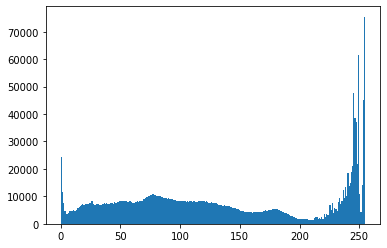

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name
image=cv.imread(fileName)                     #load image

#convert image to array
imageArray=np.array(image)

#flatten 3D array (2D in dimension + 1D in colour channel) in a 1D array
allIntensities=imageArray.ravel()

#plot history of value
#no. of bin=256
#value range 0-255
plt.hist(allIntensities,256,[0,255]);
plt.show()

##Histogram of RGB Channels
Instead of putting all 3 channels into the same histogram, we can separately plot each channel.

We can manipulate the array to extract each channel. Alternatively, OpenCV also has a `calcHist(...)` function. (See details of `cv.calcHist(...)` [here](https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html))

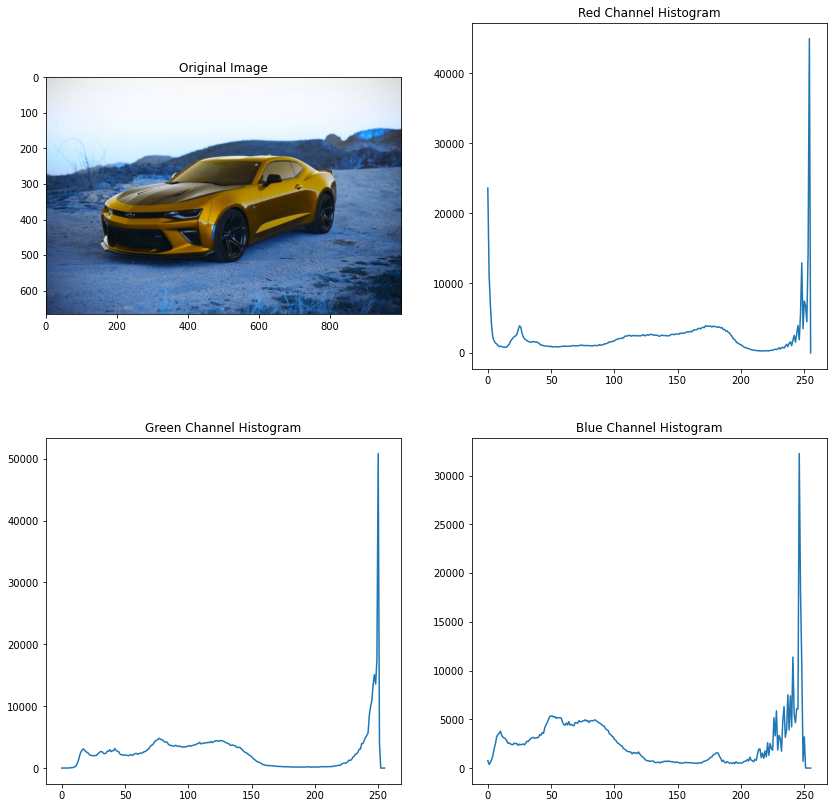

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name
image=cv.imread(fileName)                     #load image

#Calculate histogram for the  three channels
#Note that OpenCV has channels in the order of BGR insetad of RGB in the image/array.
blueHist=cv.calcHist([image],[0],None,[256],[0,255])
greenHist=cv.calcHist([image],[1],None,[256],[0,255])
redHist=cv.calcHist([image],[2],None,[256],[0,255])

fig=plt.figure(figsize=(14,14))

#original image
ax1=fig.add_subplot(2,2,1)
plt.imshow(image)

#red
ax2=fig.add_subplot(2,2,2)
plt.plot(redHist)

#green
ax3=fig.add_subplot(2,2,3)
plt.plot(greenHist)

#blue
ax4=fig.add_subplot(2,2,4)
plt.plot(blueHist)

ax1.title.set_text('Original Image')
ax2.title.set_text('Red Channel Histogram')
ax3.title.set_text('Green Channel Histogram')
ax4.title.set_text('Blue Channel Histogram')
plt.show()

##Colour Spaces

In this module, we will focus in using the RGB colour space, or grayscale.

We have seen in Lab01 on how to convert an RGB image into grayscale using OpenCV:

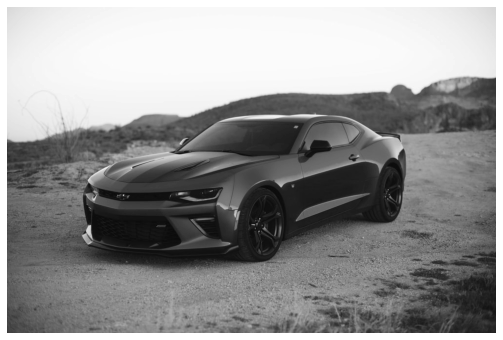

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name
image=cv.imread(fileName)                     #load image

#convert RGB (or BGR in OpenCV) into grayscale
grayImage= cv.cvtColor(image,cv.COLOR_BGR2GRAY)

#show the grayscale image
fig,ax=plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(grayImage,cmap='gray')

##Geometric/Affine Transformation

As discussed in the lecture, Affine transformation can be done by a 3x3 matrix multiplication:

<center>
$\begin{pmatrix}
x'\\
y'\\
1
\end{pmatrix}
=
\begin{pmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{23}\\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x\\
y\\
1
\end{pmatrix}$
</center>

Using different values for $a_{ij}$ allows us to do translation, rotation, scaling, and shearing operations.

##Identity Transformation

The simplest transformation is the Identity matrix which does not change the image at all:

<center>
$\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}$
</center>

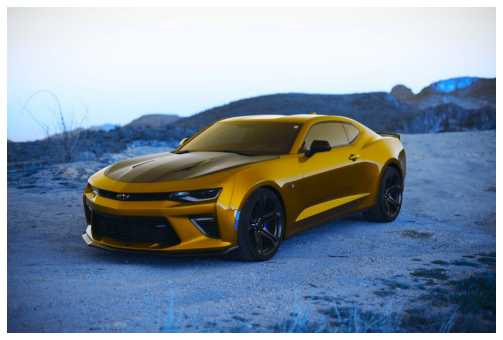

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name
image=cv.imread(fileName)                     #load image

#indentity matrix
#image is not changed
matrix = [[1, 0, 0], 
          [0, 1, 0]]

t = np.float32(matrix)# get the sizes
h, w = image.shape[:2]# transform

#transform image
transformedImage=cv.warpAffine(image,t,(w, h))
fig,ax=plt.subplots(1,figsize=(10,6))
ax.axis('off')   
plt.imshow(transformedImage)

##Translation

Translation moves an image in the X-Y plate. It is done by the following matrix:
<center>
$\begin{pmatrix}
1 & 0 & d_{x} \\
0 & 1 & d_{y} \\
0 & 0 & 1
\end{pmatrix}$
</center>


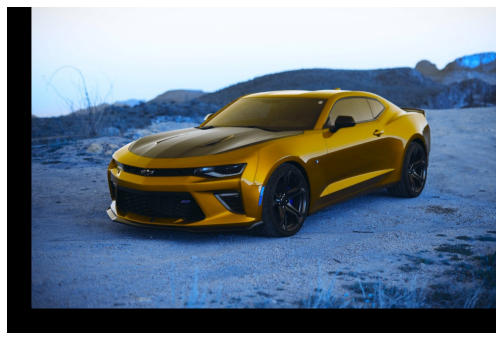

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name
image=cv.imread(fileName)                     #load image

#translation matrix
#move X by 50 pixels, Y by -50 pixels
matrix = [[1, 0, 50],
          [0, 1, -50]]

t = np.float32(matrix)# get the sizes
h, w = image.shape[:2]# transform
img = cv.warpAffine(image, t, (w, h))# plot
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(img)

##Rotation

The Rotation matrix rotates the image around the origin by an angle $\theta$ in the clockwise direction:

<center>
$\begin{pmatrix}
cos(\theta) & -sin(\theta) & 0 \\
sin(\theta) & cos(\theta) & 0 \\
0 & 0 & 1
\end{pmatrix}$
</center>


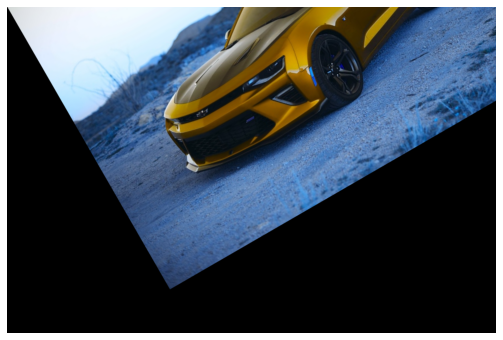

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name
image=cv.imread(fileName)                     #load image

#rotate anti-clockwise by 30 degree
#
theta=-30             #in degree
theta=theta/180*np.pi #map degree into radian

matrix = [[np.cos(theta), -np.sin(theta), 0],
          [np.sin(theta), np.cos(theta), 0]]

t = np.float32(matrix)# get the sizes
h, w = image.shape[:2]# transform
img = cv.warpAffine(image, t, (w, h))# plot
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(img)

##Tasks
1. Try to rotate the image around its centre by 30 degree anti-clockwise. (Hint: You will need to translate the image centre to the origin first. Explore how you can chain multiple transformations using matrix multiplication. See `numpy.matmul(...)` [here](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html).)

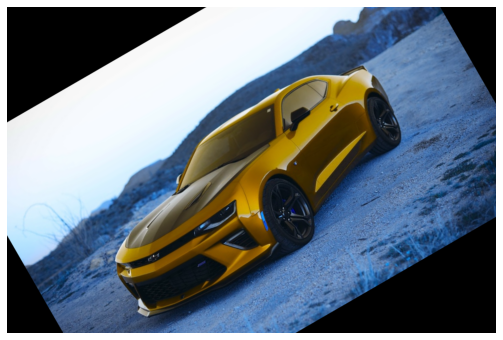

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/cars.jpeg'              #image file name
image=cv.imread(fileName)                     #load image

#find height and width of image
(height,width,channels)=image.shape

#1st matrix to move image left by half the width and up by half the height
#so that centre of image is now at origin
m1=[[1,0,-int(width/2)],
    [0,1,-int(height/2)],
    [0,0,1]]


#2nd matrix to rotate anti-clockwise by 30 degree around origin
theta=-30             #in degree
theta=theta/180*np.pi #map into radian
m2= [[np.cos(theta), -np.sin(theta), 0],
     [np.sin(theta), np.cos(theta), 0],
     [0,0,1]]

#3rd matrix to move image back to original position
m3=[[1,0,int(width/2)],
    [0,1,int(height/2)],
    [0,0,1]]

#To chain 3 transformations, we use matrix multiplication.
#We apply m1 to image 1st, then m2, finally m3.
#The final transformation matrix=m3*m2*m1
#Note that OpenCV only take the 1st 2 rows of the matrix.
matrix=np.matmul(m3,np.matmul(m2,m1))[:2]

t = np.float32(matrix)# get the sizes
h, w = image.shape[:2]# transform
img = cv.warpAffine(image, t, (w, h))# plot
fig, ax = plt.subplots(1, figsize=(10,6))
ax.axis('off')   
plt.imshow(img)

##Filters

Filtering requires 2 arrays: the original image, and the filter/kernel.
At any point, in the original image, the corresponding output pixel will be the sum of products of the filter coefficients and the image pixels encompassed by the filter. Recall, that we also said that Filters have different shapes and sizes (i.e. $3 \times 3$, $5 \times 5$, etc..).

For example, removing noise from an image using low pass filters such as mean, median and Gaussian filters. Recall, that the process is simply like sliding the filter over the image. A $3 \times 3$ averaging filter looks like this:

<center>
$
\frac{1}{9}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{pmatrix}$
</center>


Some OpenCV reference you may want to see:
1. Reference of `cv.blur(...)` for doing averaging over the filter is [here](https://docs.opencv.org/4.7.0/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37).
1. `cv.medianBlur(...)` for doing Median blur is [here](https://docs.opencv.org/4.7.0/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9).
1. `cv.GaussianBlur(...)` for doing Gaussian blue is [here](https://docs.opencv.org/4.7.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1).

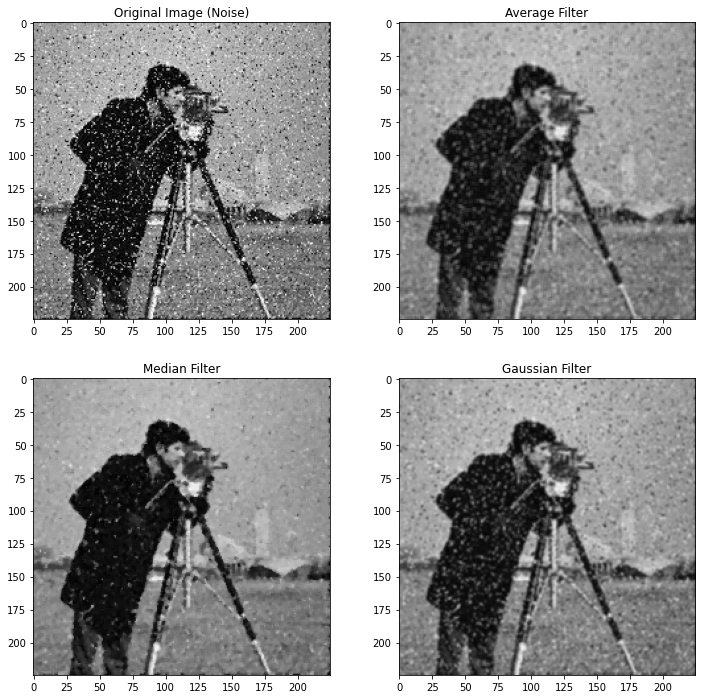

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/filters.jpeg'
image=cv.imread(fileName)                     #load image

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
plt.imshow(image)

# apply average filter 
averageF=cv.blur(image,(3,3))
ax2=fig.add_subplot(2,2,2)
plt.imshow(averageF)

# apply median filter 
medianF=cv.medianBlur(image,3)
ax3=fig.add_subplot(2,2,3)
plt.imshow(medianF)

# apply Gaussian Filter
gaussF=cv.GaussianBlur(image, (3,3),0)
ax4=fig.add_subplot(2,2,4)
plt.imshow(gaussF)

ax1.title.set_text('Original Image (Noise)')
ax2.title.set_text('Average Filter')
ax3.title.set_text('Median Filter')
ax4.title.set_text('Gaussian Filter')
plt.show()

##Tasks

1. Try different kernel sizes on the Mean/Average filter and see the effect. e.g. $3 \times 3$, $5 \times 5$, $15 \times 15$, etc.

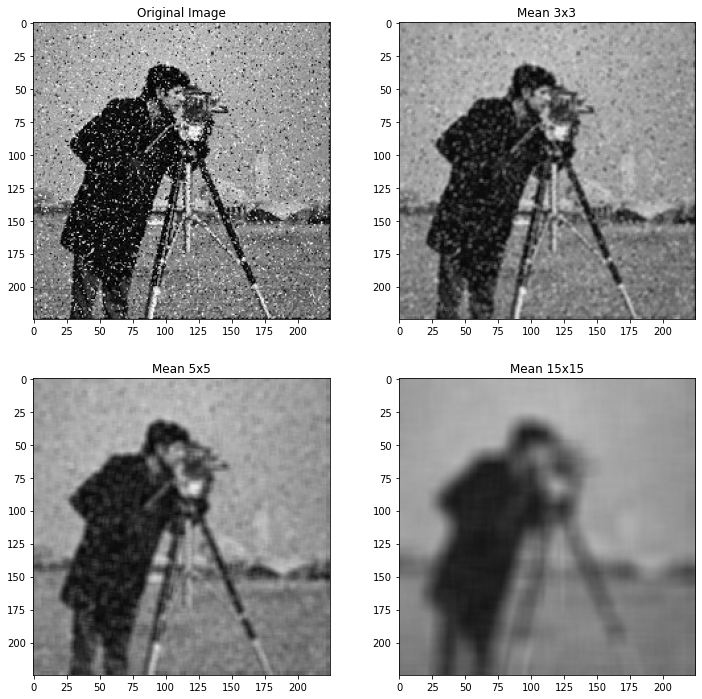

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/filters.jpeg'
image=cv.imread(fileName)                     #load image

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
plt.imshow(image)

# apply average filter 
average3=cv.blur(image,(3,3))
ax2=fig.add_subplot(2,2,2)
plt.imshow(average3)

# apply median filter 
average5=cv.blur(image,(5,5))
ax3=fig.add_subplot(2,2,3)
plt.imshow(average5)

# apply Gaussian Filter
average15=cv.blur(image,(15,15))
ax4=fig.add_subplot(2,2,4)
plt.imshow(average15)

ax1.title.set_text('Original Image')
ax2.title.set_text('Mean 3x3')
ax3.title.set_text('Mean 5x5')
ax4.title.set_text('Mean 15x15')
plt.show()

##Image Gradient and Edge Detection

The image gradient calculates the change in pixel intensity in both directions (horizontal and vertical) by performing convolution operation on the image with a kernel (filter). Often the kernel values are chosen so that two rows or columns have opposite signs. As discussed in the class, this could be achieved by various kernels.

Sobel filter horizontal kernel:
<center>
$\begin{pmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\
\end{pmatrix}$
</center>

Sobel filter vertical kernel:
<center>
$\begin{pmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{pmatrix}$
</center>

Laplacian filter  kernel:
<center>
$\begin{pmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 \\
\end{pmatrix}$
</center>

1. Reference of `cv.Sobel(...)` is [here](https://docs.opencv.org/4.7.0/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d).
1. Reference of `cv.Laplacian(...)` is [here](https://docs.opencv.org/4.7.0/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6).

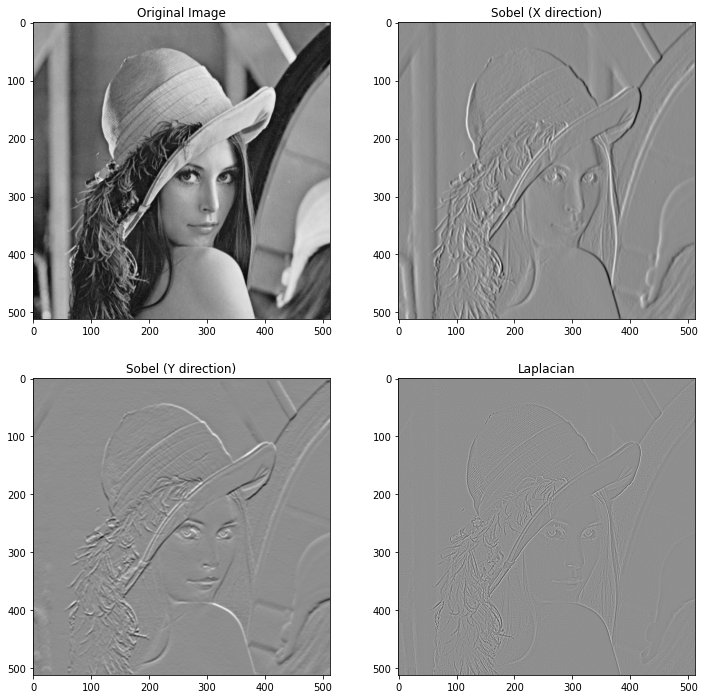

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

#load image and convert to grayscale
#
gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/lena.png'
image=cv.imread(fileName)
grayImage=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

#show original image
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
plt.imshow(grayImage,cmap='gray')

#Sobel filter in the x direction 
sobelx = cv.Sobel(grayImage,cv.CV_64F,1,0,ksize=5)
ax2 = fig.add_subplot(2,2,2)
plt.imshow(sobelx,cmap='gray')

#Sobel filter in the y direction 
sobely = cv.Sobel(grayImage,cv.CV_64F,0,1,ksize=5)
ax3 = fig.add_subplot(2,2,3)
plt.imshow(sobely,cmap='gray')

#Laplacian filter
laplacian = cv.Laplacian(grayImage,cv.CV_64F)
ax4 = fig.add_subplot(2,2,4)
plt.imshow(laplacian,cmap='gray')

ax1.title.set_text('Original Image')
ax2.title.set_text('Sobel (X direction)')
ax3.title.set_text('Sobel (Y direction)')
ax4.title.set_text('Laplacian')

Another common edge detection algorithm is the Canny edge algorithm. It is already available in OpenCV. Reference of `cv.Canny(...)` is [here](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de).

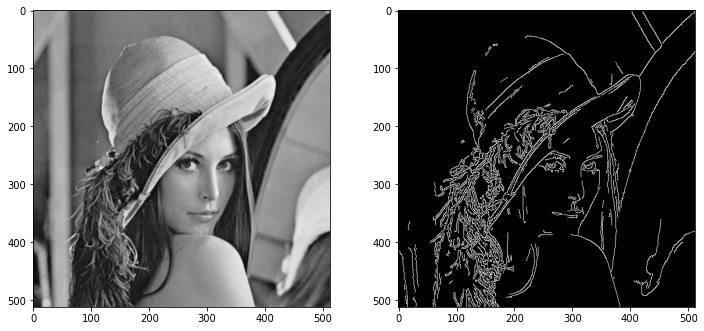

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np

#load image and convert to grayscale
#
gDriveFolder='/content/gdrive/MyDrive'        #GoogleDrive mount point
dataFolder=gDriveFolder+'/cm4709/Lab02/data'  #*** Modify this to your data folder in GoogleDrive
fileName=dataFolder+'/lena.png'
image=cv.imread(fileName)
grayImage=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,2,1)
plt.imshow(grayImage,cmap='gray')

#Canny edge detection
cannyEdge = cv.Canny(grayImage,100,200)
ax2 = fig.add_subplot(2,2,2)
plt.imshow(cannyEdge,cmap='gray')

#Notes:
Image gradients played a central role in traditional computer vision methods, where the gradients are calculated in the x and y directions.
Using the gradients, important features can be extracted e.g. edges, corner points, etc. Edges can be detected by calculating the gradient in the X and Y directions.
